In [1]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
breast_cancer_wisconsin_diagnostic = fetch_ucirepo(id=17) 
  
# data (as pandas dataframes) 
X = breast_cancer_wisconsin_diagnostic.data.features 
y = breast_cancer_wisconsin_diagnostic.data.targets 
  
# metadata 
print(breast_cancer_wisconsin_diagnostic.metadata) 
  
# variable information 
print(breast_cancer_wisconsin_diagnostic.variables) 

{'uci_id': 17, 'name': 'Breast Cancer Wisconsin (Diagnostic)', 'repository_url': 'https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic', 'data_url': 'https://archive.ics.uci.edu/static/public/17/data.csv', 'abstract': 'Diagnostic Wisconsin Breast Cancer Database.', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 569, 'num_features': 30, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['Diagnosis'], 'index_col': ['ID'], 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1993, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C5DW2B', 'creators': ['William Wolberg', 'Olvi Mangasarian', 'Nick Street', 'W. Street'], 'intro_paper': {'title': 'Nuclear feature extraction for breast tumor diagnosis', 'authors': 'W. Street, W. Wolberg, O. Mangasarian', 'published_in': 'Electronic imaging', 'year': 1993, 'url': 'https://www.semanticscholar.org/paper/53

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import manifold
from sklearn import datasets
from IPython import display
import pylab as pl
from sklearn import preprocessing
from collections import OrderedDict
from functools import partial
from time import time
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import NullFormatter
import seaborn as sns
from sklearn.decomposition import PCA

In [5]:
y['Diagnosis'].replace(['M','B'],[1,0], inplace=True)

C:\Users\ramit\AppData\Local\Temp\ipykernel_13692\601749624.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y['Diagnosis'].replace(['M','B'],[1,0], inplace=True)


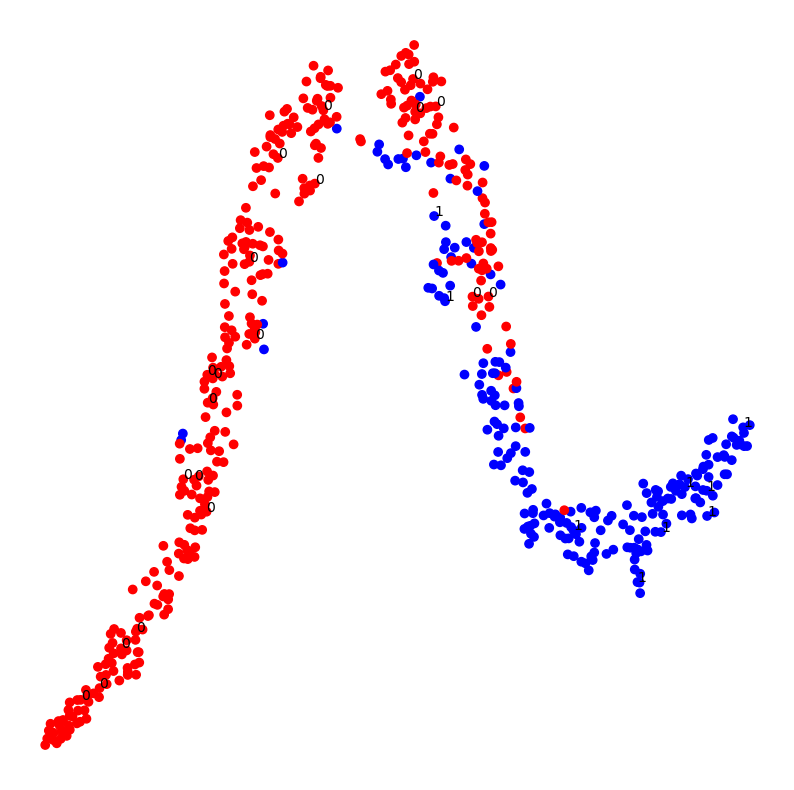

In [6]:
for i in range (250, 500, 2):
  fig = plt.figure(figsize=(10,10))

  #model
  xe = manifold.TSNE(n_components=2, n_iter=i, perplexity=30, random_state=0).fit_transform(X)

  # plot
  plt.scatter(xe[:,0], xe[:,1], c = y['Diagnosis'].map({0: 'red', 1: 'blue'}))

  for i, txt in enumerate(y['Diagnosis'].tolist()):
    if(i%20 == 0):
      plt.annotate(str(txt), (xe[i,0], xe[i,1]))

  plt.axis('off')
  display.clear_output(wait=True)
  display.display(pl.gcf())

  #time.sleep(1)
  plt.clf()
  plt.cla()
  plt.close('all')

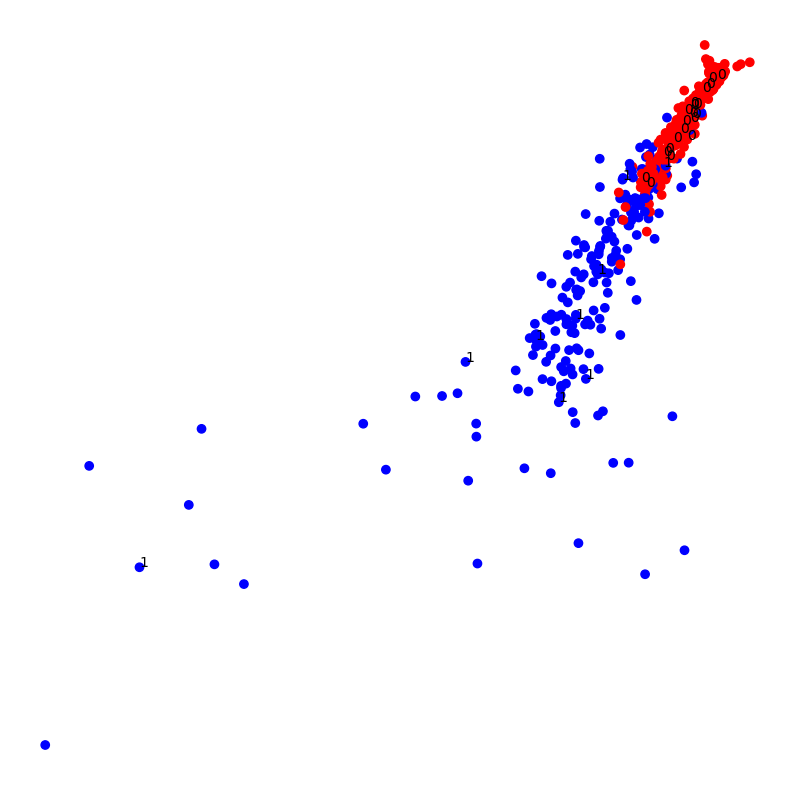

In [7]:
for i in range (250, 500, 2):
  fig = plt.figure(figsize=(10,10))

  #model
  xe = manifold.MDS(n_components=2, max_iter=50, n_init=4, random_state=0, normalized_stress=False).fit_transform(X)

  # plot
  plt.scatter(xe[:,0], xe[:,1], c = y['Diagnosis'].map({0: 'red', 1: 'blue'}))

  for i, txt in enumerate(y['Diagnosis'].tolist()):
    if(i%20 == 0):
      plt.annotate(str(txt), (xe[i,0], xe[i,1]))

  plt.axis('off')
  display.clear_output(wait=True)
  display.display(pl.gcf())

  #time.sleep(1)
  plt.clf()
  plt.cla()
  plt.close('all')

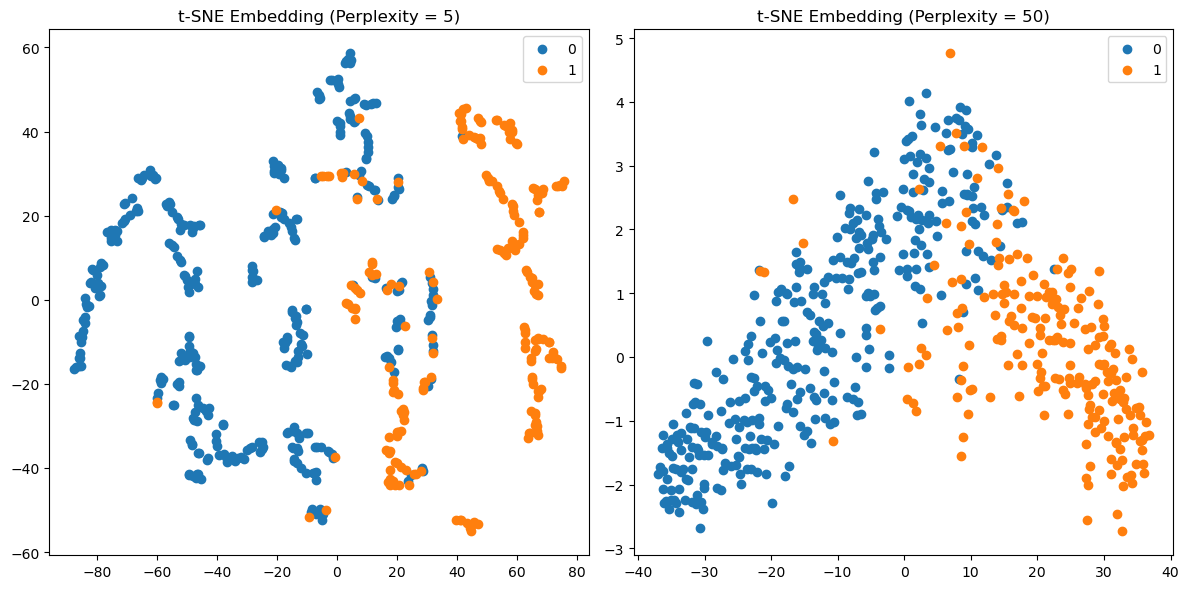

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.manifold import TSNE

# Apply t-SNE with two different perplexity values
perplexity_low = 5
perplexity_high = 50

tsne_low = TSNE(n_components=2, perplexity=perplexity_low, random_state=42)
embedding_low = tsne_low.fit_transform(X)

tsne_high = TSNE(n_components=2, perplexity=perplexity_high, random_state=42)
embedding_high = tsne_high.fit_transform(X)

# Visualize the embeddings
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(embedding_low[y['Diagnosis'] == 0, 0], embedding_low[y['Diagnosis'] == 0, 1], label='0')
plt.scatter(embedding_low[y['Diagnosis'] == 1, 0], embedding_low[y['Diagnosis'] == 1, 1], label='1')
plt.title(f"t-SNE Embedding (Perplexity = {perplexity_low})")
plt.legend()

plt.subplot(1, 2, 2)
plt.scatter(embedding_high[y['Diagnosis'] == 0, 0], embedding_high[y['Diagnosis'] == 0, 1], label='0')
plt.scatter(embedding_high[y['Diagnosis'] == 1, 0], embedding_high[y['Diagnosis'] == 1, 1], label='1')
plt.title(f"t-SNE Embedding (Perplexity = {perplexity_high})")
plt.legend()

plt.tight_layout()
plt.show()